In [1]:


#For deeper_extraction and simplify_rail, add to path
# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to the Python path
parent_dir = os.path.join(current_dir, '..')
sys.path.append(parent_dir)



NameError: name 'os' is not defined

In [ ]:
import sys
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import rasterio
import pickle
sys.path.append(r'C:\repos\ra2ce')
sys.path.append(r'C:\repos\ra2ce_multi_network')
from ra2ce.ra2ce_handler import Ra2ceHandler #import the ra2cehandler to run ra2ce analyses
import networkx as nx


In [ ]:
root_dir = Path ("C:/","Users","peregrin","osm", "RA2CE_inputs") #specify the path to the folder holding the RA2CE folder and input data
print(root_dir)

assert root_dir.exists(), "root_dir not found."

C:\Users\peregrin\osm\RA2CE_inputs


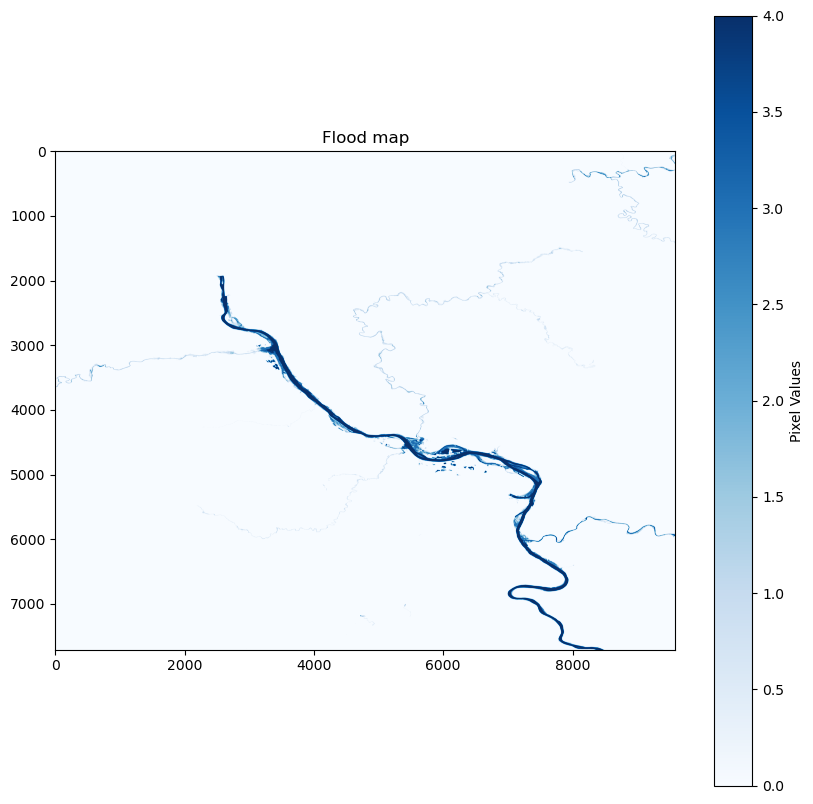

In [ ]:
hazard_folder = root_dir / "static" / "hazard" # find the hazard folder where you locate your floo dmap
hazard_map = hazard_folder / "DERP_RW_M_4326_wdepth.tif" # set the location of the hazard map

# Open the TIF file using rasterio
with rasterio.open(hazard_map) as src:
    # Read the TIF file as a numpy array
    tif_array = src.read(1)  # Change the band index (1) if necessary

plt.figure(figsize=(10, 10))
plt.imshow(tif_array, cmap='Blues')  # Change the colormap if desired
plt.colorbar(label='Pixel Values')
plt.title('Flood map')
plt.show()

In [ ]:
_network_ini_name = "haz_network.ini" #set the name for the network.ini
_analysis_ini_name = "analysis.ini" #set the name for the analysis.ini

network_ini = root_dir / _network_ini_name
assert network_ini.is_file()

analysis_ini = root_dir / _analysis_ini_name
assert analysis_ini.is_file()

In [ ]:
#open base_graph.p, check if it has an infra_type column, if not add
output_graph_path=fr'C:\Users\peregrin\osm\RA2CE_inputs\static\output_graph\orig_base_graph.p'
editted_graph_path=fr'C:\Users\peregrin\osm\RA2CE_inputs\static\output_graph\base_graph.p'
with open(output_graph_path, 'rb') as f:
    base_graph_pre_edit = pickle.load(f)

if nx.get_edge_attributes(base_graph_pre_edit, 'road_type')!={}:
    print('Road type found')
else: 
    print('Road type not found')
    nx.set_edge_attributes(base_graph_pre_edit, 'primary', name='road_type')
    nx.set_edge_attributes(base_graph_pre_edit, 'motorway', name='infra_type')
    if nx.get_edge_attributes(base_graph_pre_edit, 'road_type')!={}:
        print('Road type set')

# Save the outputs

with open(editted_graph_path, 'wb') as f:
    pickle.dump(base_graph_pre_edit, f)

Road type not found
Road type set


In [ ]:
base_graph_pre_edit.edges[(2, 3, 0)]
#base_graph_editted.edges[(2, 3, 0)]

{'from_id': 2,
 'to_id': 3,
 'osm_id': '4349788',
 'railway': 'rail',
 'name': 'Voreifelbahn',
 'gauge': '1435',
 'electrified': 'no',
 'voltage': '',
 'bridge': 'yes',
 'maxspeed': '100',
 'service': '',
 'tunnel': 'None',
 'other_tags': '"layer"=>"1","operator"=>"DB Netz AG","passenger_lines"=>"2","proposed:electrified"=>"contact_line","proposed:frequency"=>"16.7","proposed:voltage"=>"15000","railway:etcs"=>"no","railway:lzb"=>"no","railway:pzb"=>"yes","railway:radio"=>"gsm-r","railway:traffic_mode"=>"passenger","ref"=>"2645","tracks"=>"1","usage"=>"main","wikidata"=>"Q1699351","wikipedia"=>"de:Voreifelbahn"',
 '_11': '"passenger"',
 'usage': '"main"',
 'geometry': <LINESTRING (7.02 50.705, 7.02 50.704, 7.02 50.704)>,
 'id': 818,
 'length': 0.07294187178244692,
 'road_type': 'primary',
 'infra_type': 'motorway'}

In [ ]:
handler = Ra2ceHandler(network=network_ini, analysis=analysis_ini)
handler.configure()
handler.run_analysis()

2024-01-26 05:17:07 PM - [ra2ce_logging.py:41] - root - INFO - RA2CE logger initialized.
2024-01-26 05:17:07 PM - [ra2ce_logging.py:41] - root - INFO - RA2CE logger initialized.
2024-01-26 05:17:07 PM - [ra2ce_logging.py:41] - root - INFO - RA2CE logger initialized.
2024-01-26 05:17:07 PM - [ra2ce_logging.py:41] - root - INFO - RA2CE logger initialized.
2024-01-26 05:17:07 PM - [ra2ce_logging.py:41] - root - INFO - RA2CE logger initialized.
2024-01-26 05:17:07 PM - [ra2ce_logging.py:41] - root - INFO - RA2CE logger initialized.
2024-01-26 05:17:07 PM - [ra2ce_logging.py:41] - root - INFO - RA2CE logger initialized.
2024-01-26 05:17:07 PM - [networks.py:186] - root - INFO - Apparently, you already did create a network with ra2ce earlier. Ra2ce will use this: C:\Users\peregrin\osm\RA2CE_inputs\static\output_graph\base_graph.p
2024-01-26 05:17:07 PM - [networks.py:186] - root - INFO - Apparently, you already did create a network with ra2ce earlier. Ra2ce will use this: C:\Users\peregrin\o

KeyError: 'infra_type'